In [ ]:
#################################### This script creates fig. 5 of the article ###############################

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
# Load values manually from dataset manual analysis
Plots = ['P1', 'P2', 'P3', 'P4', 'P5','P6', 'P7', 'P8', 'P9']
ER_mean = [0.92,1.36,1.25,0.82,0.98,0.80,0.95,0.82,0.86]
GEP_mean = [-1.23,-1.76,-0.87,-1.16,-1.42,-1.27,-1.28,-0.87,-1.31]
NEE_mean = [-0.31,-0.40,-0.28,-0.34,-0.44,-0.47,-0.33,-0.05,-0.45]
ER_std = [0.407312772,0.492303906,0.510562135,0.245641767,0.333230692,0.372870627,0.473595471,0.255020599,0.333092164]
GEP_std = [0.538165423,0.791409576,0.484210425,0.225105883,0.427038148,0.282273261,0.407464402,0.14436845,0.379562727]
NEE_std = [0.297094456,0.452320074,0.170410916,0.128852407,0.404948229,0.091190332,0.224140446,0.209692899,0.160890902]

In [3]:
# Load other subplots
dataset = pd.read_csv('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/FIELD_NEE.csv',sep=';')
FIELD_NEE = pd.DataFrame(dataset)
dataset = pd.read_csv('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/FIELD_ER.csv',sep=';')
FIELD_ER = pd.DataFrame(dataset)
dataset = pd.read_csv('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/FIELD_GEP.csv',sep=';')
FIELD_GEP = pd.DataFrame(dataset)

vals_FIELD_NEE, names_FIELD_NEE, xs_FIELD_NEE = [],[],[]
vals_FIELD_ER, names_FIELD_ER, xs_FIELD_ER = [],[],[]
vals_FIELD_GEP, names_FIELD_GEP, xs_FIELD_GEP = [],[],[]

for i, col in enumerate(FIELD_NEE.columns):
    vals_FIELD_NEE.append(FIELD_NEE[col].values)
    names_FIELD_NEE.append(col)
    xs_FIELD_NEE.append(np.random.normal(i + 1, 0.04, FIELD_NEE[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
for i, col in enumerate(FIELD_ER.columns):
    vals_FIELD_ER.append(FIELD_ER[col].values)
    names_FIELD_ER.append(col)
    xs_FIELD_ER.append(np.random.normal(i + 1, 0.04, FIELD_ER[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
for i, col in enumerate(FIELD_GEP.columns):
    vals_FIELD_GEP.append(FIELD_GEP[col].values)
    names_FIELD_GEP.append(col)
    xs_FIELD_GEP.append(np.random.normal(i + 1, 0.04, FIELD_GEP[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

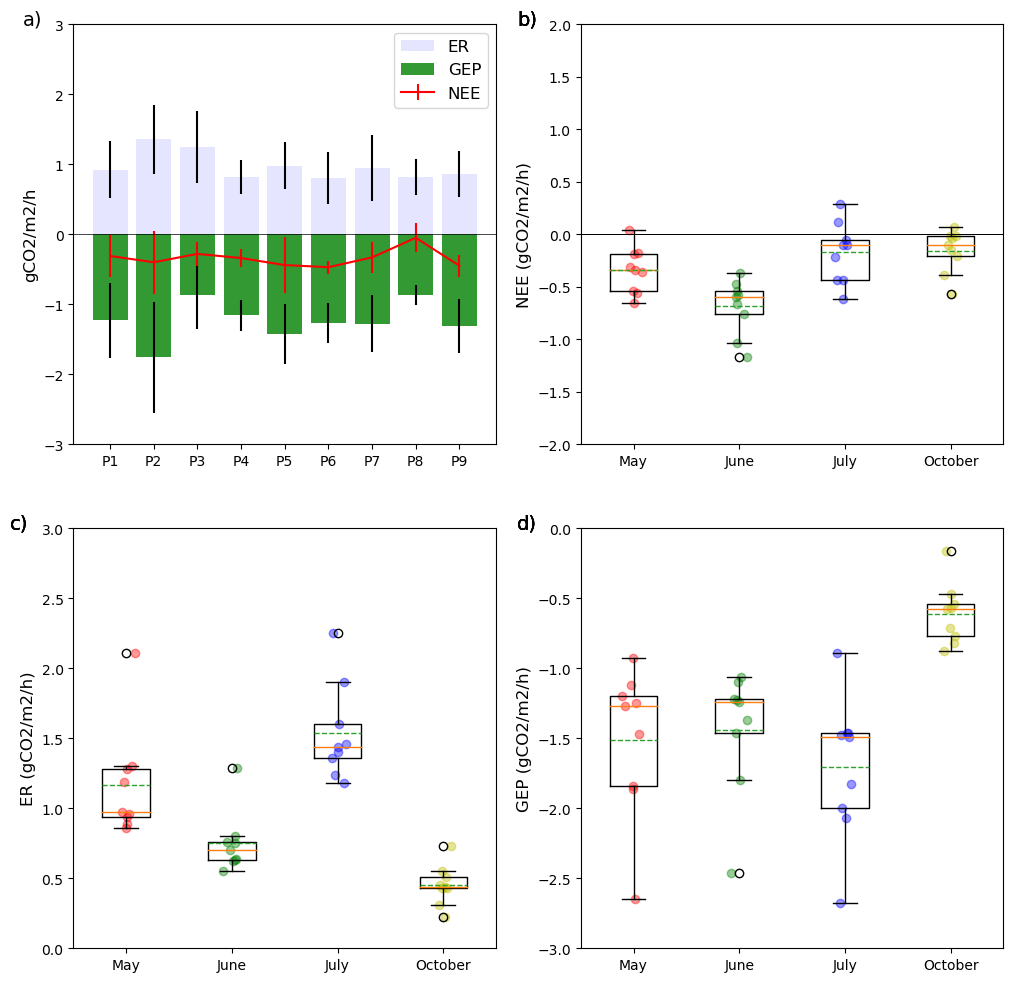

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

bplot1 = ax1.bar(Plots, ER_mean,yerr= ER_std,color='b',alpha=0.1,label='ER')
ax1.bar(Plots, GEP_mean,yerr= GEP_std,color='g',alpha=0.8,label='GEP')
ax1.errorbar(Plots, NEE_mean, yerr= NEE_std, color='r',label='NEE')
ax1.set_ylabel("gCO2/m2/h", fontweight='normal', fontsize=12)
ax1.set_ylim([-3, 3])
ax1.axhline(y=0, color='black', linewidth=0.5)
ax1.text(-2, 3, 'a)', fontsize = 14)
ax1.legend(fontsize=12)

bplot2 = ax2.boxplot(vals_FIELD_NEE, labels=names_FIELD_NEE, notch=False,showmeans=True,meanline=True)
bplot3 = ax3.boxplot(vals_FIELD_ER, labels=names_FIELD_ER, notch=False,showmeans=True,meanline=True)
bplot4 = ax4.boxplot(vals_FIELD_GEP, labels=names_FIELD_GEP, notch=False,showmeans=True,meanline=True)

palette = ['r', 'g', 'b', 'y']

for xA, xB, xC, valA, valB, valC, c in zip(xs_FIELD_NEE, xs_FIELD_ER, xs_FIELD_GEP, vals_FIELD_NEE, vals_FIELD_ER, vals_FIELD_GEP, palette):
    ax2.scatter(xA, valA, alpha=0.4, color=c)
    ax2.set_ylabel("NEE (gCO2/m2/h)", fontweight='normal', fontsize=12)
    ax2.set_ylim([-2, 2])
    ax2.axhline(y=0, color='black', linewidth=0.5)
    ax2.text(-0.1, 2, 'b)', fontsize = 14)
    
    ax3.scatter(xB, valB, alpha=0.4, color=c)
    ax3.set_ylabel("ER (gCO2/m2/h)", fontweight='normal', fontsize=12)
    ax3.set_ylim([0, 3])
    ax3.axhline(y=0, color='black', linewidth=0.5)
    ax3.text(-0.1, 3, 'c)', fontsize = 14)
    
    ax4.scatter(xC, valC, alpha=0.4, color=c)
    ax4.set_ylabel("GEP (gCO2/m2/h)", fontweight='normal', fontsize=12)
    ax4.set_ylim([-3, 0])
    ax4.axhline(y=0, color='black', linewidth=0.5)
    ax4.text(-0.1, 0, 'd)', fontsize = 14)
    
#plt.savefig("F:/Redaction/Bernadouze/Submitted/R2/Figure5.tif", dpi=600)  